<a href="https://colab.research.google.com/github/amitgit2510/Info_miners_2/blob/Ashwath/Course_Project_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
# import stats library
from scipy import stats

# import labelEncoder
from sklearn.preprocessing import LabelEncoder

# import train test split
from sklearn.model_selection import train_test_split,GridSearchCV

# import time library
import time

import statsmodels.api as sm

# import qqplot
from statsmodels.graphics.gofplots import qqplot

# import crossval
from sklearn.model_selection import cross_val_score

# import Stander Scaler
from sklearn.preprocessing import StandardScaler

# importing libraries to calculte errors of the model
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error,r2_score

# import Regression libraries
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet,SGDRegressor,SGDClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor

# improt label_binarize library
from sklearn.preprocessing import label_binarize

# import Classification libraries
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,StackingClassifier
from xgboost import XGBClassifier

# import variance_inflation_factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

# import perfromance metrics
from sklearn.metrics import roc_auc_score,roc_curve,accuracy_score,precision_score,recall_score,cohen_kappa_score,f1_score,confusion_matrix,classification_report
from sklearn.metrics import silhouette_score, silhouette_samples


# import PCA library
from sklearn.decomposition import PCA

# import clustering algorithms
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering,DBSCAN
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.neighbors import NearestNeighbors

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cophenet


# # import warning library to suppress warnings
from warnings import filterwarnings
filterwarnings('ignore')



import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from matplotlib import rcParams


In [13]:
df = pd.read_csv("/content/drive/MyDrive/hospital-inpatient-discharges-sparcs-de-identified-2010-1.csv")
df.head()

,index,Health Service Area,Hospital County,Operating Certificate Number,Facility ID,Facility Name,Age Group,Zip Code - 3 digits,Gender,Race,...,Source of Payment 2,Source of Payment 3,Attending Provider License Number,Operating Provider License Number,Other Provider License Number,Birth Weight,Abortion Edit Indicator,Emergency Department Indicator,Total Charges,Total Costs
0,0,Capital/Adiron,Albany,101000.0,1.0,Albany Medical Center Hospital,18 to 29,NaN,F,White,...,Self-Pay,NaN,3623.0,NaN,NaN,0,N,Y,4476.23,1672.65
1,1,Capital/Adiron,Albany,101000.0,1.0,Albany Medical Center Hospital,50 to 69,NaN,M,White,...,Medicare,Blue Cross,216951.0,216951.0,NaN,0,N,Y,148612.34,51414.70
2,2,Capital/Adiron,Albany,101000.0,1.0,Albany Medical Center Hospital,70 or Older,NaN,M,White,...,Blue Cross,Self-Pay,3076.0,NaN,NaN,0,N,N,16561.99,4032.49
3,3,Capital/Adiron,Albany,101000.0,1.0,Albany Medical Center Hospital,70 or Older,NaN,F,White,...,Insurance Company,Self-Pay,140796.0,140796.0,170254.0,0,N,N,13593.51,4947.81
4,4,Capital/Adiron,Albany,101000.0,1.0,Albany Medical Center Hospital,70 or Older,NaN,F,White,...,Insurance Company,Self-Pay,170254.0,170254.0,170254.0,0,N,N,31962.58,16988.33


In [14]:
df.shape

(2622133, 38)

In [15]:
df.dtypes

index                                    int64
Health Service Area                     object
Hospital County                         object
Operating Certificate Number           float64
Facility ID                            float64
Facility Name                           object
Age Group                               object
Zip Code - 3 digits                     object
Gender                                  object
Race                                    object
Ethnicity                               object
Length of Stay                          object
Type of Admission                       object
Patient Disposition                     object
Discharge Year                           int64
CCS Diagnosis Code                     float64
CCS Diagnosis Description               object
CCS Procedure Code                     float64
CCS Procedure Description               object
APR DRG Code                             int64
APR DRG Description                     object
APR MDC Code 

In [16]:
df.describe()

,index,Operating Certificate Number,Facility ID,Discharge Year,CCS Diagnosis Code,CCS Procedure Code,APR DRG Code,APR MDC Code,APR Severity of Illness Code,Attending Provider License Number,Operating Provider License Number,Other Provider License Number,Birth Weight,Total Charges,Total Costs
count,2.622133e+06,2.617246e+06,2.617246e+06,2622133.0,2.619860e+06,2.619860e+06,2.622133e+06,2.622133e+06,2.622133e+06,2.617246e+06,1.951315e+06,4.881420e+05,2.622133e+06,2.622133e+06,2.622133e+06
mean,1.311066e+06,5.019051e+06,1.036953e+03,2010.0,1.919431e+02,1.121324e+02,4.069629e+02,1.016206e+01,1.948373e+00,1.266323e+06,1.569229e+06,2.213083e+06,3.103701e+02,2.945920e+04,1.186523e+04
std,7.569447e+05,2.249577e+06,6.448892e+02,0.0,1.565932e+02,8.761224e+01,2.404910e+02,5.923678e+00,8.986120e-01,8.226220e+06,9.379695e+06,1.225216e+07,9.769686e+02,5.640021e+04,2.727029e+04
min,0.000000e+00,1.010000e+05,1.000000e+00,2010.0,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.100000e+01,0.000000e+00,1.000000e-02,0.000000e+00
25%,6.555330e+05,2.951001e+06,5.410000e+02,2010.0,1.060000e+02,0.000000e+00,1.980000e+02,5.000000e+00,1.000000e+00,1.666590e+05,1.644990e+05,1.662850e+05,0.000000e+00,7.900000e+03,3.290510e+03
50%,1.311066e+06,5.907002e+06,1.117000e+03,2010.0,1.570000e+02,1.240000e+02,3.610000e+02,8.000000e+00,2.000000e+00,2.053620e+05,2.012870e+05,2.029570e+05,0.000000e+00,1.567373e+04,6.175350e+03
75%,1.966599e+06,7.002002e+06,1.450000e+03,2010.0,2.180000e+02,2.110000e+02,6.400000e+02,1.500000e+01,3.000000e+00,2.335610e+05,2.305590e+05,2.335750e+05,0.000000e+00,3.172352e+04,1.222803e+04
max,2.622132e+06,7.004010e+06,9.059000e+03,2010.0,6.700000e+02,2.310000e+02,9.560000e+02,2.500000e+01,4.000000e+00,9.100000e+07,9.100000e+07,9.100000e+07,9.900000e+03,1.206004e+07,1.470885e+07


In [17]:
df.isnull().sum()

index                                        0
Health Service Area                       4887
Hospital County                           4887
Operating Certificate Number              4887
Facility ID                               4887
Facility Name                                0
Age Group                                    0
Zip Code - 3 digits                       3201
Gender                                       0
Race                                         0
Ethnicity                                    0
Length of Stay                               0
Type of Admission                            0
Patient Disposition                        103
Discharge Year                               0
CCS Diagnosis Code                        2273
CCS Diagnosis Description                 2273
CCS Procedure Code                        2273
CCS Procedure Description                 2273
APR DRG Code                                 0
APR DRG Description                          0
APR MDC Code 

In [18]:
df1 = df.loc[df["Source of Payment 2"].isnull() == True]
df1.head()

,index,Health Service Area,Hospital County,Operating Certificate Number,Facility ID,Facility Name,Age Group,Zip Code - 3 digits,Gender,Race,...,Source of Payment 2,Source of Payment 3,Attending Provider License Number,Operating Provider License Number,Other Provider License Number,Birth Weight,Abortion Edit Indicator,Emergency Department Indicator,Total Charges,Total Costs
16487,16487,Capital/Adiron,Albany,101000.0,1.0,Albany Medical Center Hospital,18 to 29,122,F,Black/African American,...,NaN,NaN,149551.0,NaN,188988.0,0,N,Y,12603.78,3863.55
20572,20572,Capital/Adiron,Albany,101000.0,1.0,Albany Medical Center Hospital,50 to 69,122,F,Black/African American,...,NaN,NaN,253677.0,NaN,NaN,0,N,Y,15405.80,5283.37
24833,24833,Capital/Adiron,Albany,101000.0,1.0,Albany Medical Center Hospital,30 to 49,124,M,Black/African American,...,NaN,NaN,204436.0,151371.0,NaN,0,N,Y,36427.96,9428.54
30350,30350,Capital/Adiron,Albany,101000.0,1.0,Albany Medical Center Hospital,0 to 17,134,F,White,...,NaN,NaN,213633.0,174586.0,234682.0,1900,N,N,17611.90,2909.55
31923,31923,Capital/Adiron,Albany,101000.0,1.0,Albany Medical Center Hospital,70 or Older,OOS,M,White,...,NaN,NaN,216951.0,216951.0,NaN,0,N,N,33642.77,14668.58


In [19]:
df1['Source of Payment 1'].value_counts()

Insurance Company            247337
Medicaid                     213175
Blue Cross                   164620
Self-Pay                      85933
Medicare                      78238
CHAMPUS                        6064
Other Non-Federal Program      5659
Workers Compensation           5315
Other Federal Program          4027
Unknown                          13
Name: Source of Payment 1, dtype: int64

In [20]:
df['Source of Payment 2'].value_counts()

Medicaid                     580109
Self-Pay                     486614
Medicare                     326242
Insurance Company            239593
Blue Cross                   168306
CHAMPUS                        5770
Other Federal Program          3621
Other Non-Federal Program       845
Workers Compensation            353
Unknown                         299
Name: Source of Payment 2, dtype: int64

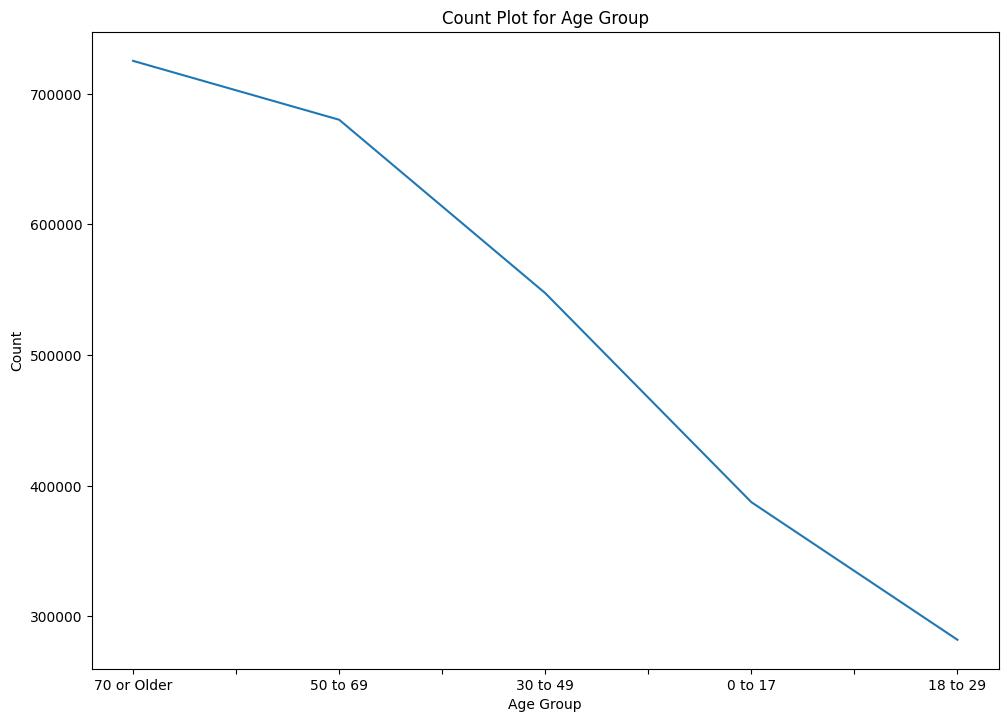

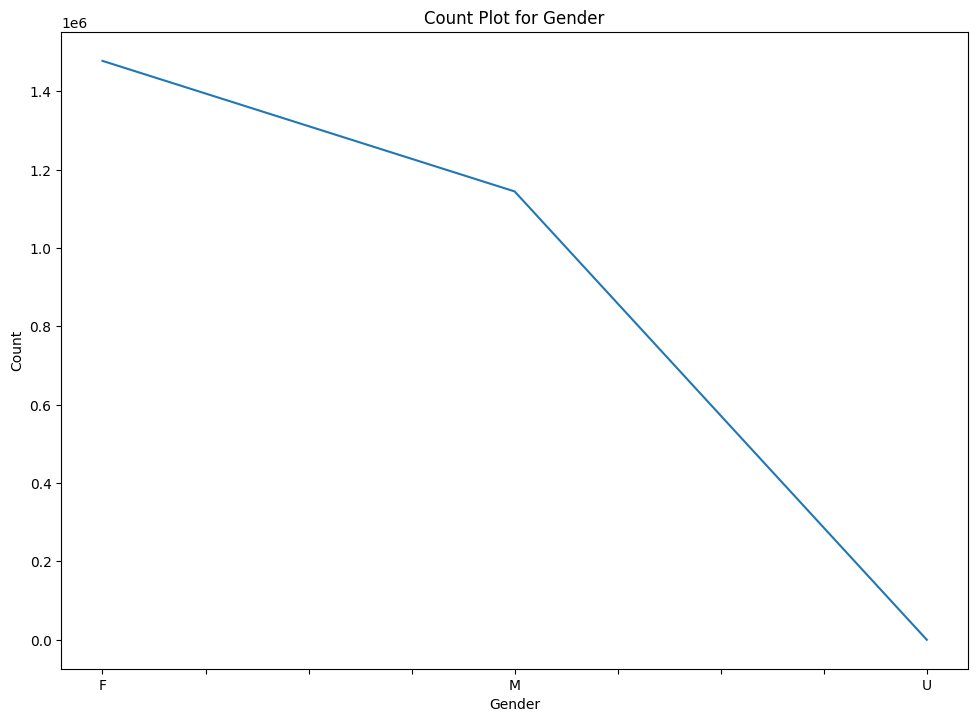

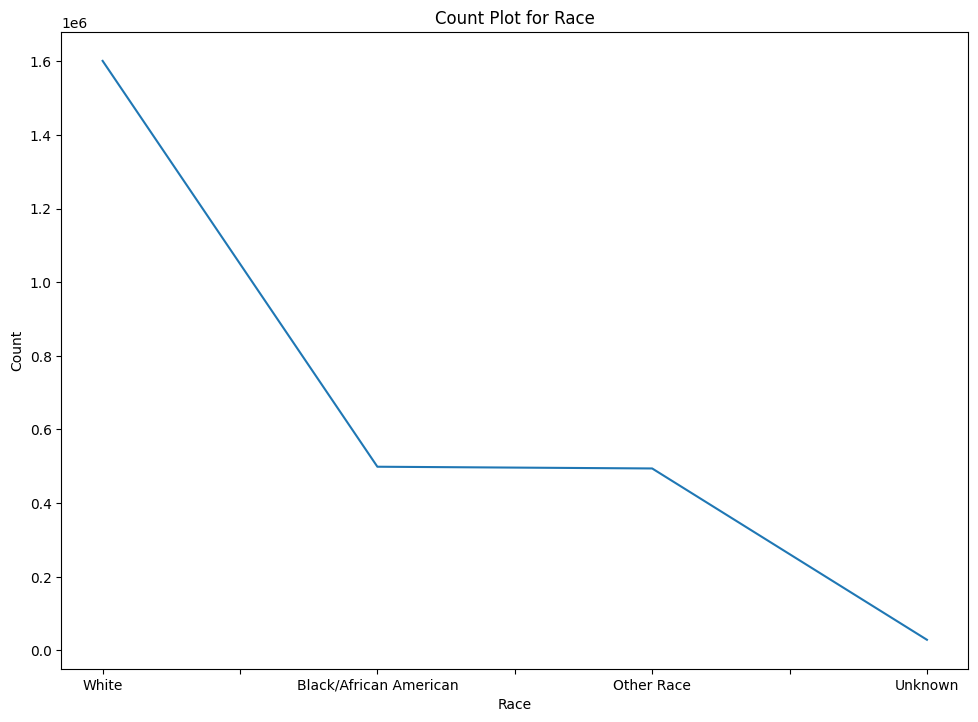

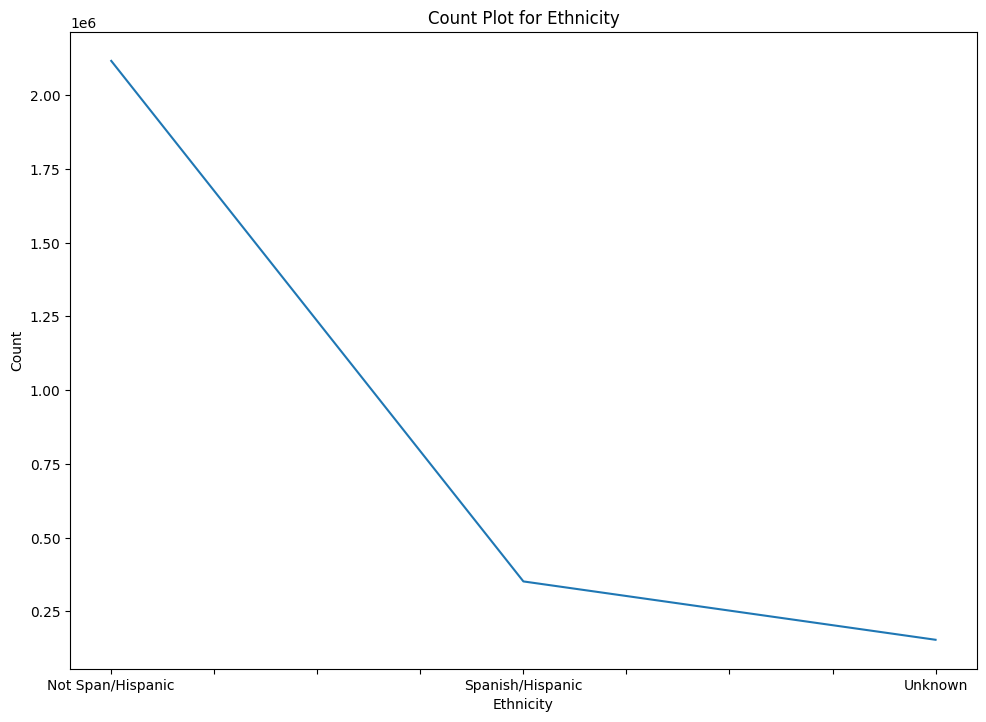

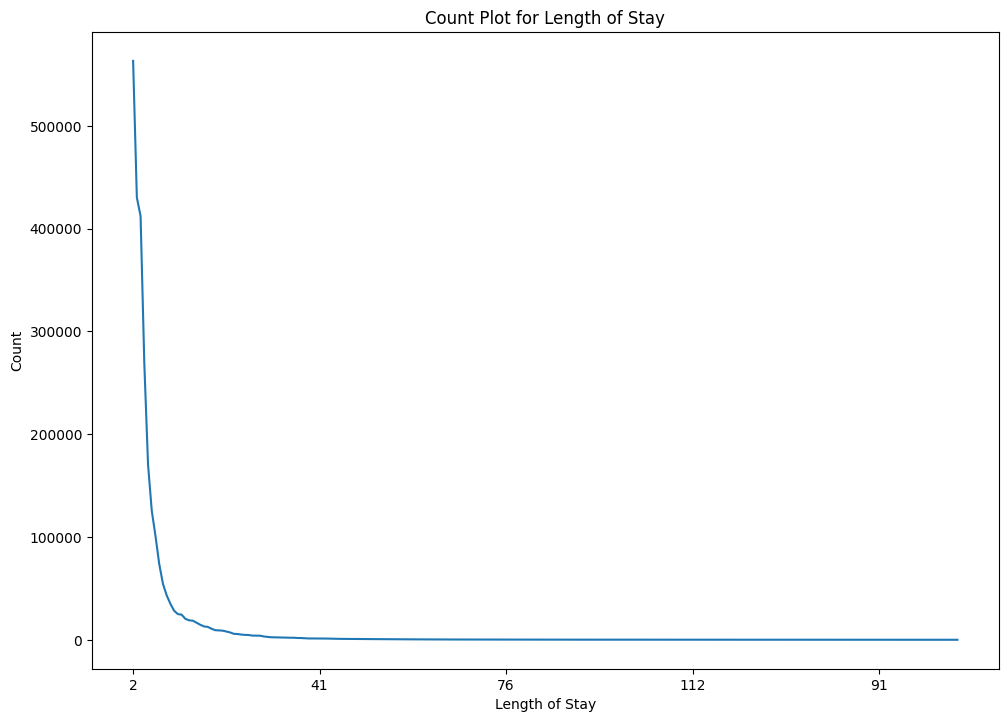

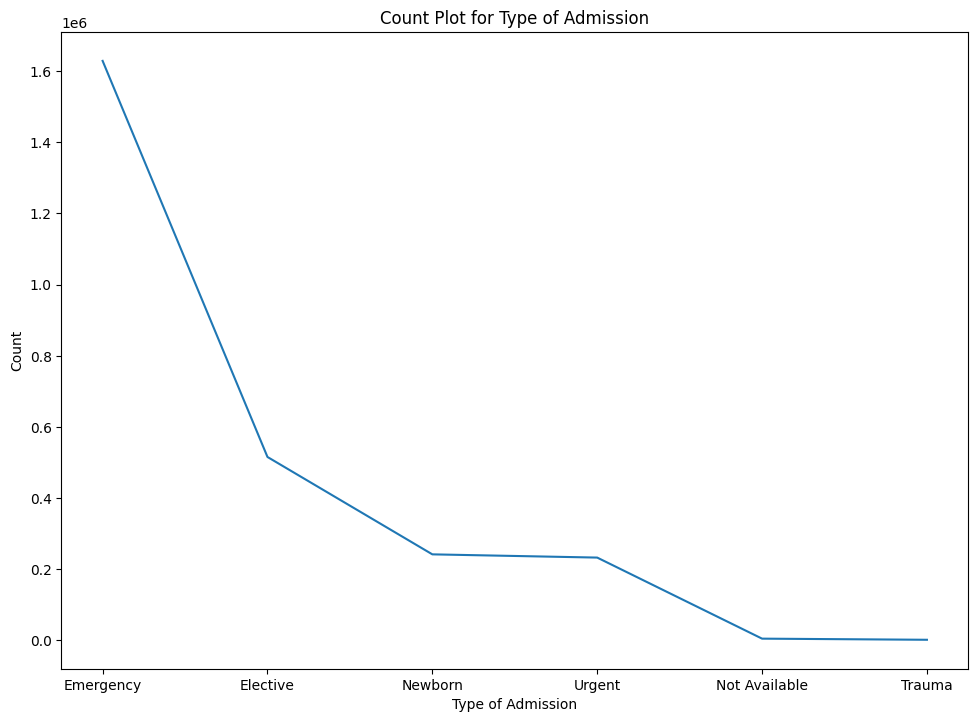

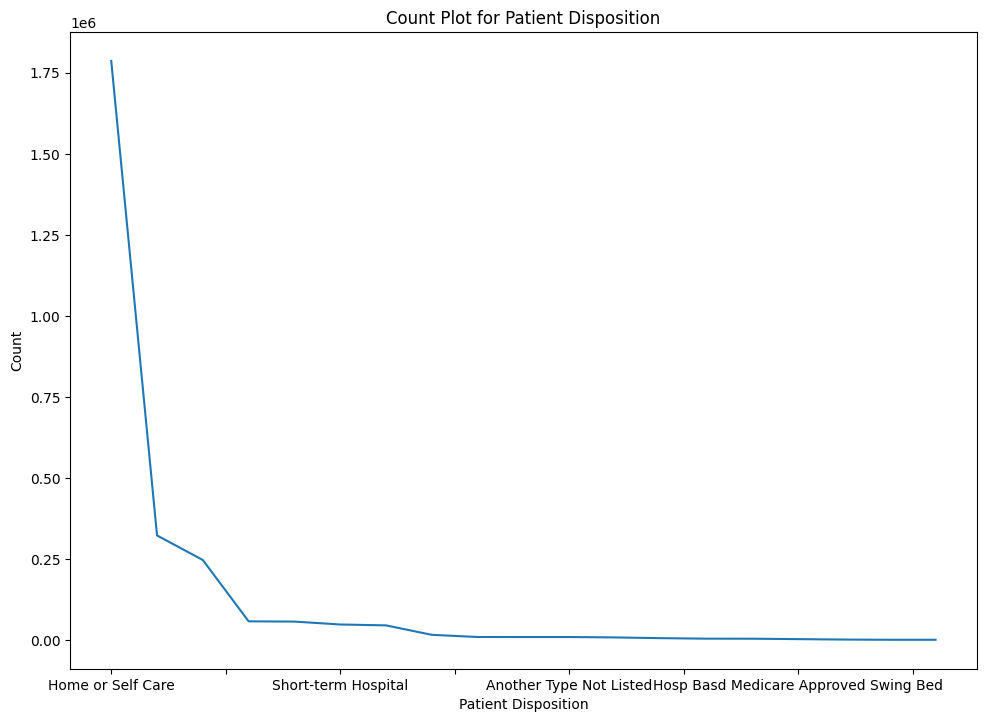

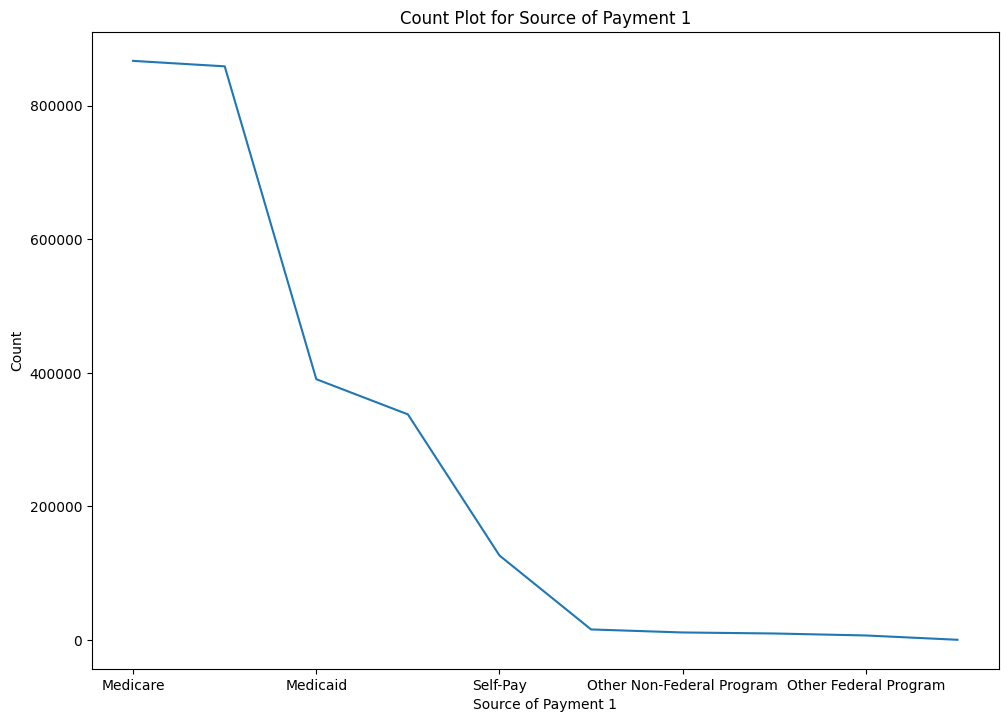

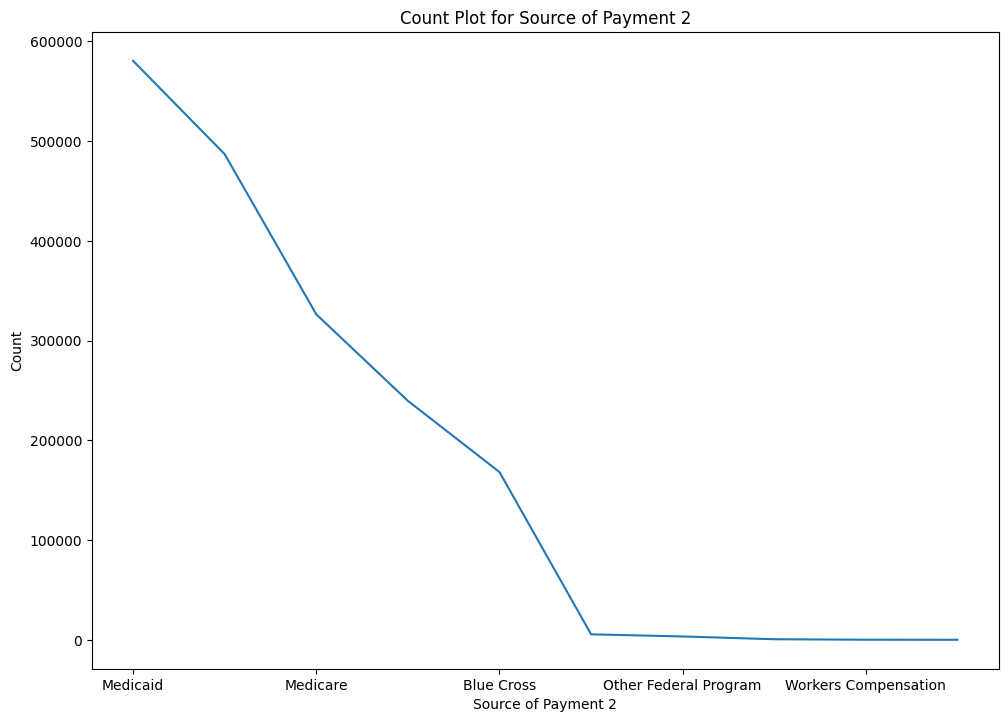

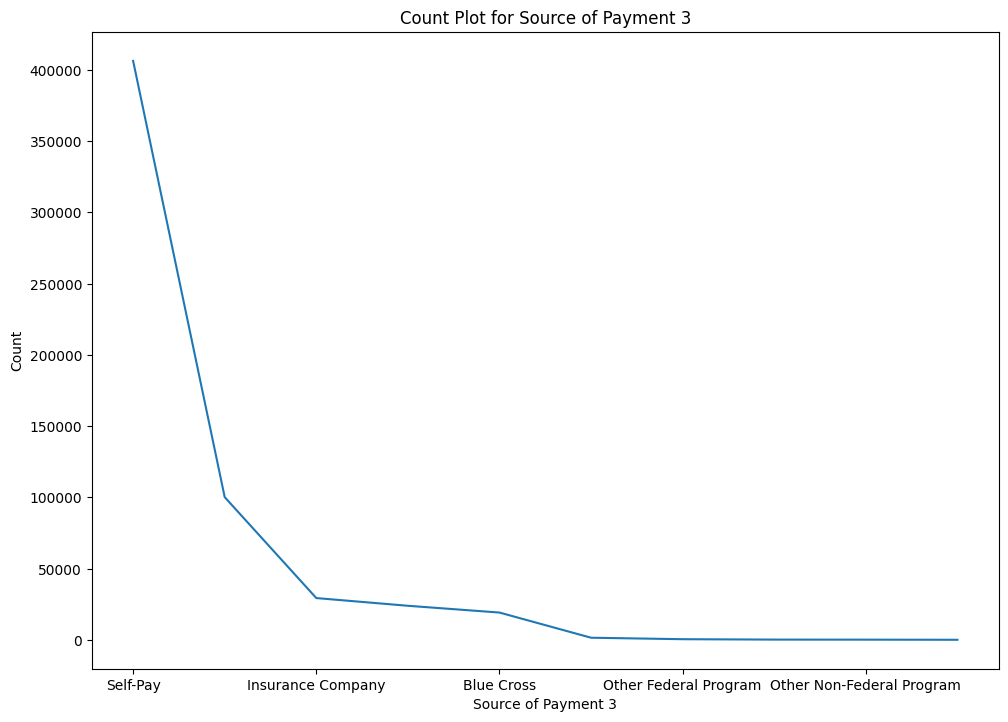

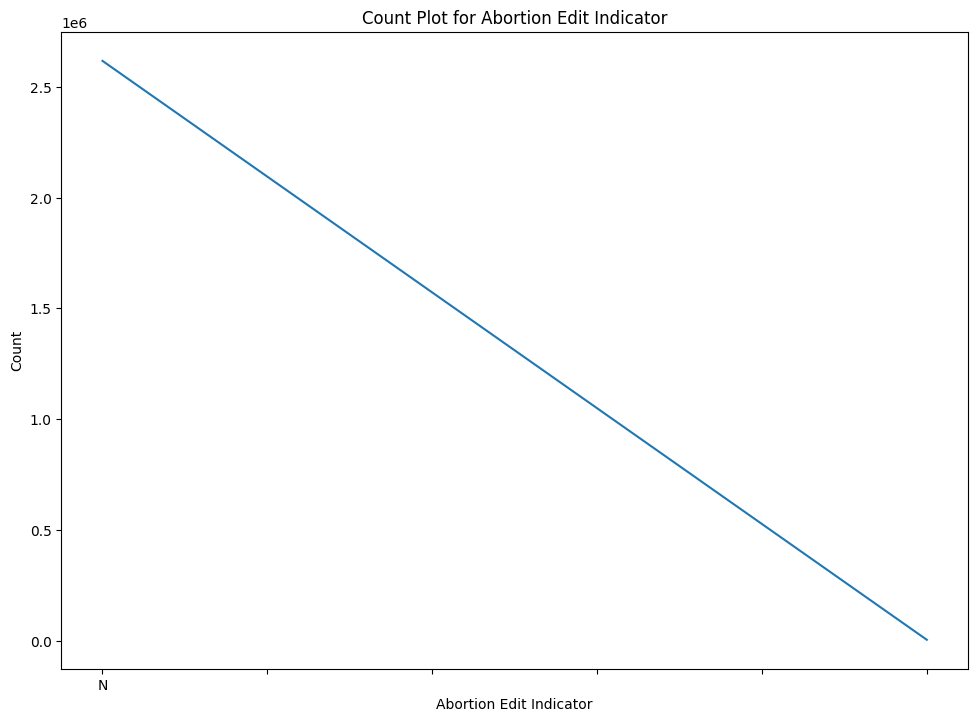

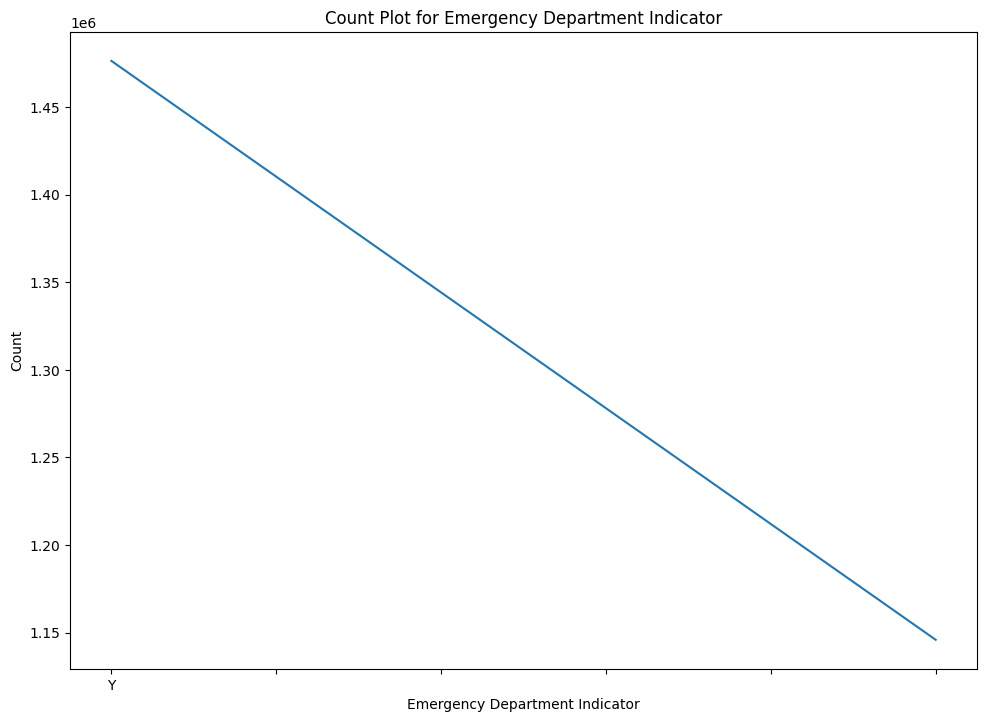

In [47]:
# figure size in inches
rcParams['figure.figsize'] = 11.7,8.27

object = ['Age Group', 'Gender', 'Race', 'Ethnicity', 'Length of Stay','Type of Admission','Patient Disposition','Source of Payment 1','Source of Payment 2','Source of Payment 3','Abortion Edit Indicator','Emergency Department Indicator']

for cat in object:
  df[cat].value_counts().plot()
  plt.xlabel(cat)
  plt.ylabel('Count')
  plt.title(f'Count Plot for {cat}')
  plt.show()

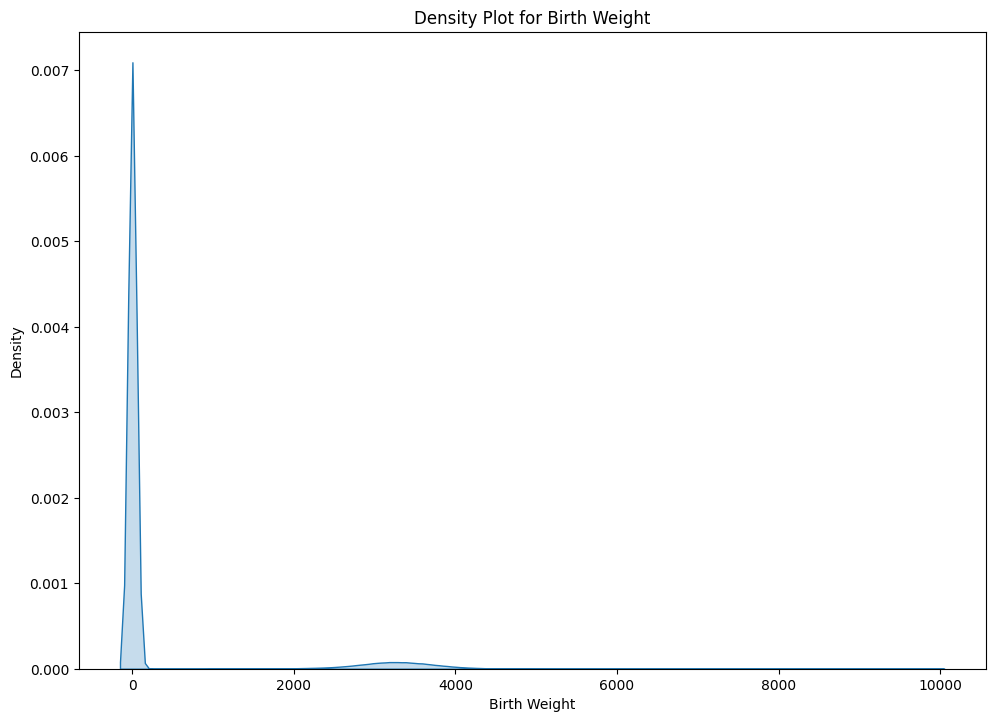

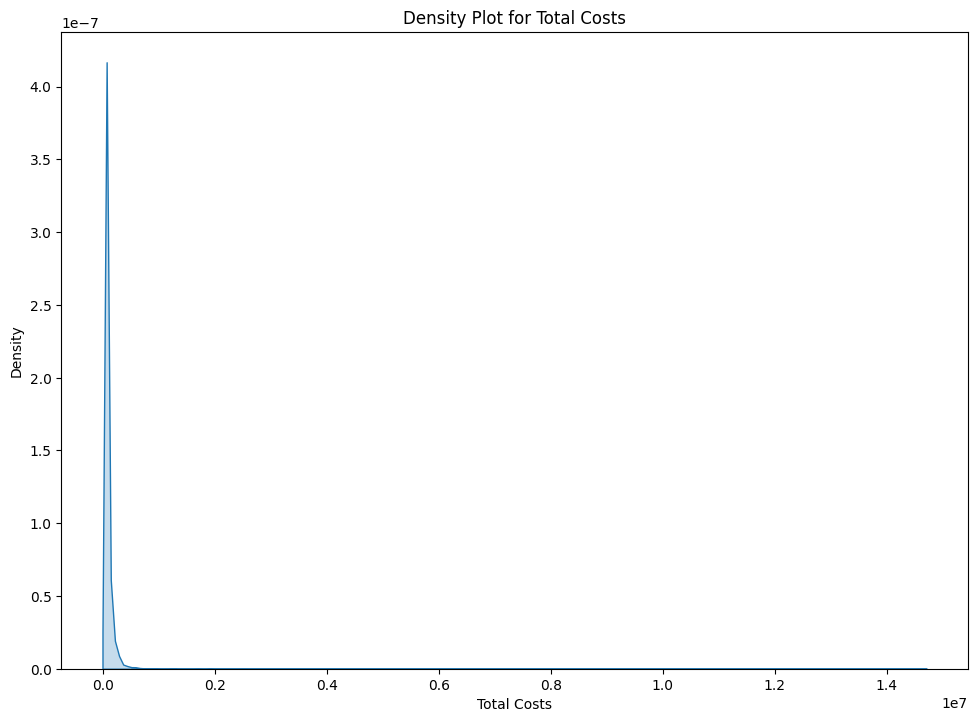

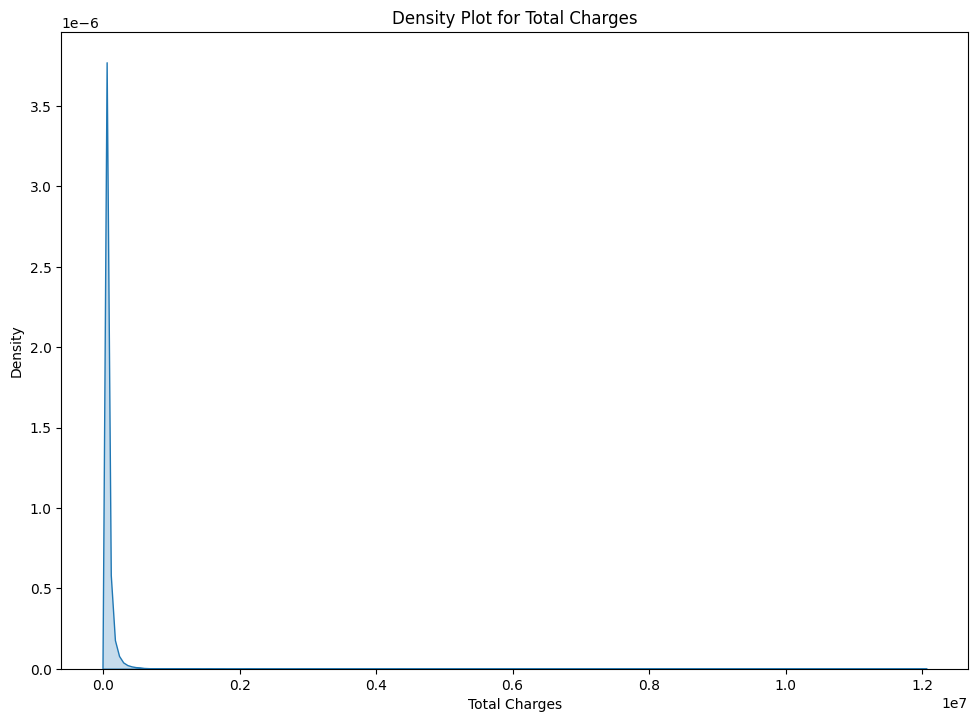

In [53]:
num = ['Birth Weight', 'Total Costs', 'Total Charges']

for col in num:
  sns.kdeplot(data=df[col], label=col, shade = True)
  plt.xlabel(col)
  plt.ylabel('Density')
  plt.title(f'Density Plot for {col}')
  plt.show()

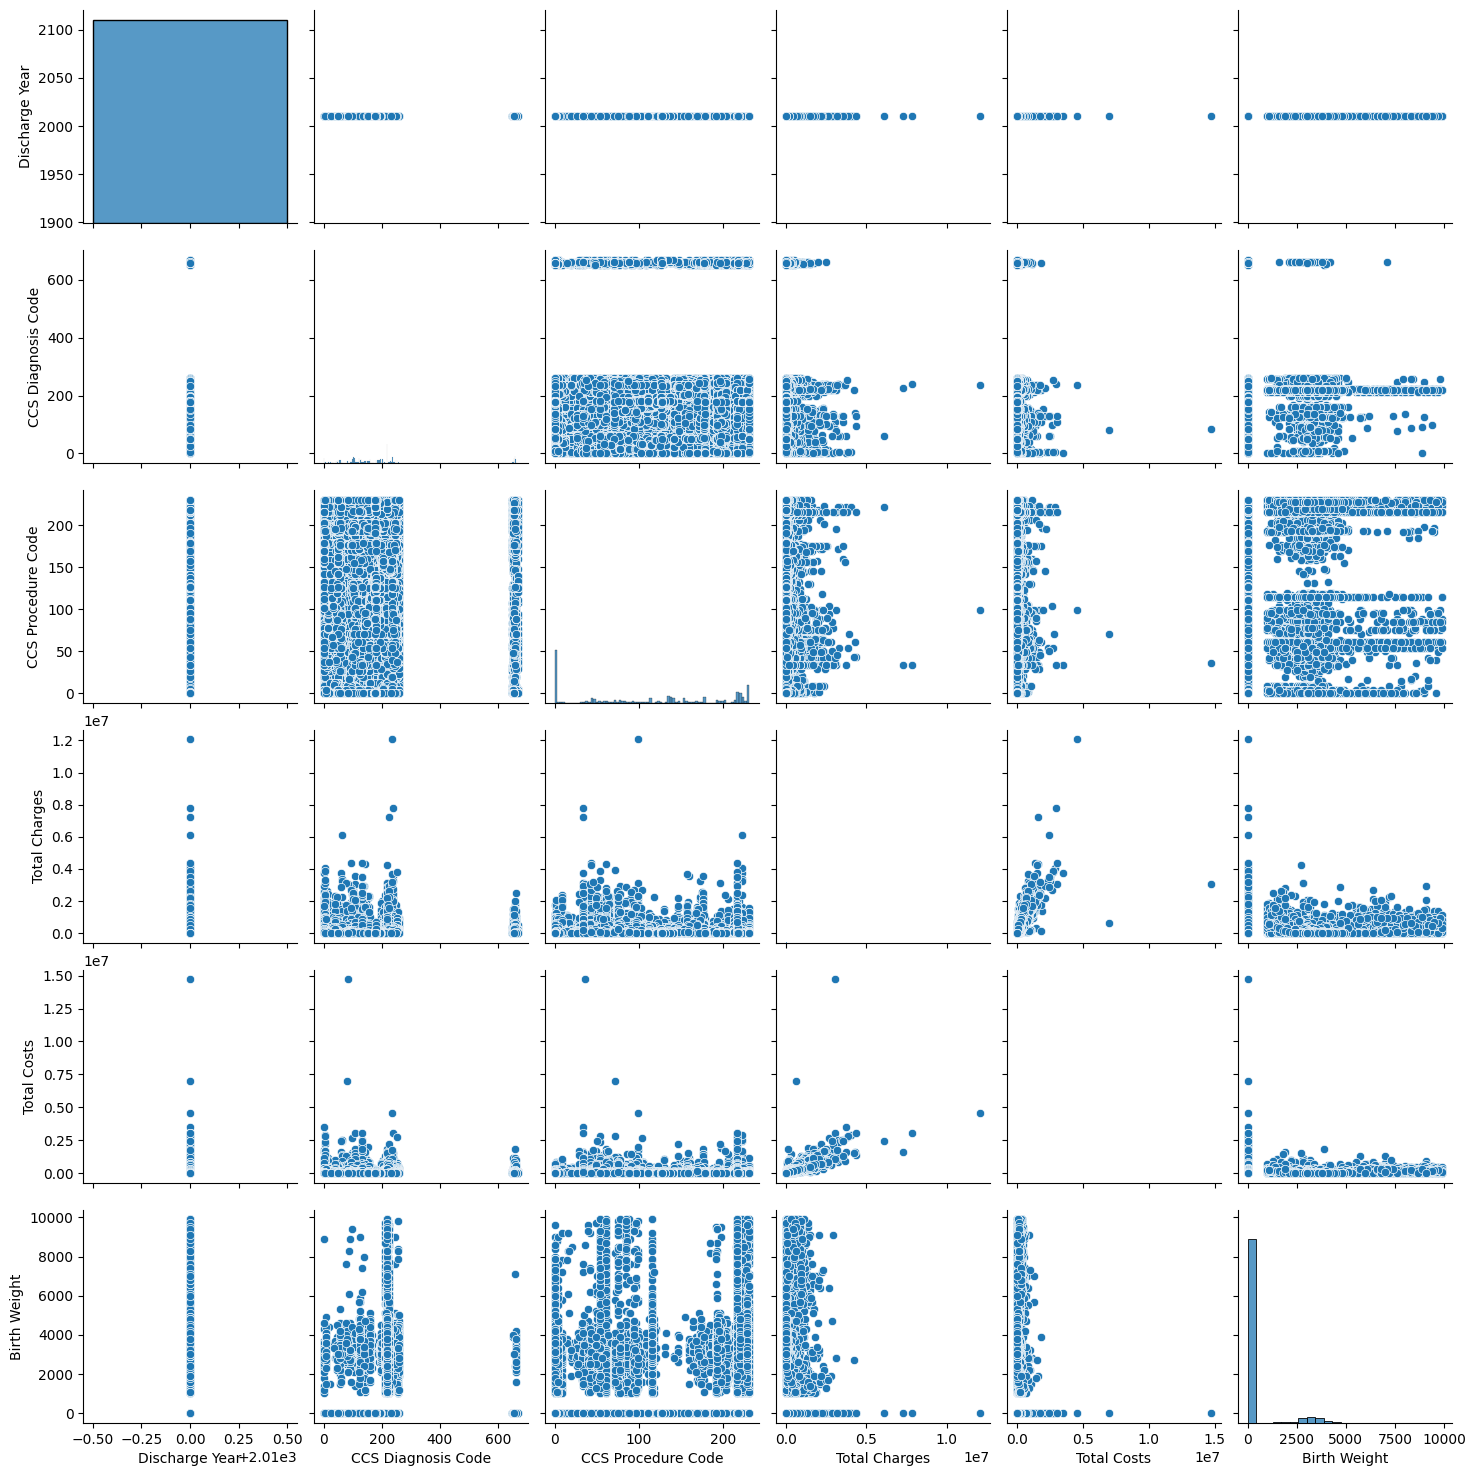

In [50]:
object = ['Age Group', 'Gender', 'Race', 'Ethnicity', 'Length of Stay','Type of Admission','Patient Disposition','Source of Payment 1','Source of Payment 2','Source of Payment 3','Abortion Edit Indicator','Emergency Department Indicator']
df2 = pd.DataFrame(df[object])

numeric = ['Discharge Year', 'CCS Diagnosis Code', 'CCS Procedure Code', 'Total Charges', 'Total Costs', 'Birth Weight']
df3 = pd.DataFrame(df[numeric])
sns.pairplot(data = df3)
plt.show()

In [22]:
# Set the style of the plots (optional)
sns.set(style="whitegrid")

# Plot density plots for each selected column
for column in numeric:
  #plt.figure(figsize=(6, 4))  # Adjust the figure size as needed
  sns.kdeplot(data=num_df[column], label=column, shade = True)
  plt.xlabel(column)
  plt.ylabel('Density')
  plt.title(f'Density Plot for {column}')
  plt.legend()
  plt.show()  # Display the individual plot within the same cell

KeyError: ignored

In [23]:
df.corr()

,index,Operating Certificate Number,Facility ID,Discharge Year,CCS Diagnosis Code,CCS Procedure Code,APR DRG Code,APR MDC Code,APR Severity of Illness Code,Attending Provider License Number,Operating Provider License Number,Other Provider License Number,Birth Weight,Total Charges,Total Costs
index,1.000000,0.876344,0.906865,NaN,0.004626,0.134145,0.040862,0.040572,-0.053251,0.000619,-0.035486,-0.080186,0.022471,0.057584,0.059875
Operating Certificate Number,0.876344,1.000000,0.747070,NaN,0.020378,0.137547,0.045278,0.045196,-0.051154,0.012031,-0.023388,-0.066738,0.014432,0.063992,0.074170
Facility ID,0.906865,0.747070,1.000000,NaN,0.010130,0.122196,0.046980,0.045777,-0.050174,-0.005738,-0.035690,-0.073875,0.039412,0.044957,0.050674
Discharge Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CCS Diagnosis Code,0.004626,0.020378,0.010130,NaN,1.000000,0.118982,0.484445,0.504995,-0.151896,0.041200,0.020183,0.032721,0.052272,-0.071353,-0.045825
CCS Procedure Code,0.134145,0.137547,0.122196,NaN,0.118982,1.000000,0.210290,0.207971,0.012771,0.001471,0.007062,-0.000350,0.145524,-0.001770,0.007290
APR DRG Code,0.040862,0.045278,0.046980,NaN,0.484445,0.210290,1.000000,0.971415,-0.119076,0.037951,0.036324,0.060269,0.301416,-0.087715,-0.061663
APR MDC Code,0.040572,0.045196,0.045777,NaN,0.504995,0.207971,0.971415,1.000000,-0.106844,0.039065,0.036230,0.062984,0.256083,-0.055312,-0.032033
APR Severity of Illness Code,-0.053251,-0.051154,-0.050174,NaN,-0.151896,0.012771,-0.119076,-0.106844,1.000000,-0.020712,-0.011650,-0.051742,-0.232027,0.331806,0.270896
Attending Provider License Number,0.000619,0.012031,-0.005738,NaN,0.041200,0.001471,0.037951,0.039065,-0.020712,1.000000,0.593437,0.446414,-0.012237,-0.016720,-0.007155
